# Data 불러오기

In [2]:
!git clone https://github.com/CoreDotToday/Mathematical-analysis-and-modeling-for-the-industrial-data-Spring-2023

Cloning into 'Mathematical-analysis-and-modeling-for-the-industrial-data-Spring-2023'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 4), reused 24 (delta 1), pack-reused 0
Unpacking objects: 100% (27/27), 1.80 MiB | 1.50 MiB/s, done.


In [3]:
%cd 'Mathematical-analysis-and-modeling-for-the-industrial-data-Spring-2023/Class1. Least Square Method'

/content/Mathematical-analysis-and-modeling-for-the-industrial-data-Spring-2023/Class1. Least Square Method


# 데이터의 존재 확인

In [4]:
import os

In [5]:
os.listdir("./dataset/temperature")

['서울_기온.csv', '울산_일조일사.csv', '서울_일조일사.csv', '울산_기온.csv']

# 그림 그리는 함수 준비하기

In [6]:
import pandas as pd
import json
import plotly.express as px
import requests
import plotly.graph_objects as go
from bs4 import BeautifulSoup
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt

# import plotly.offline as pyo
# pyo.init_notebook_mode()

In [7]:
def plot_temperature(temperature, region):
    fig = px.line(temperature, 
                    x = "일시", 
                    y = '최고기온', 
                    title = f"<{region}  월간 기온 > ",)

    fig.add_scatter(x=temperature['일시'], y=temperature['평균기온'], mode='lines', name='평균기온')
    fig.add_scatter(x=temperature['일시'], y=temperature['최저기온'], mode='lines', name='최저기온')

    fig.add_shape(type='line',
                    x0=0,
                    y0=24,
                    x1=11,
                    y1=24,
                    line=dict(color='black'),
                    line_width=1,
                    line_dash="dash",
    )

    fig.add_shape(type='line',
                    x0=0,
                    y0=30,
                    x1=11,
                    y1=30,
                    line=dict(color='black'),
                    line_width=1,
                    line_dash="dash",
    )

    fig.show()


    #fig.add_trace(go.Scatter(x=temperature['일시'], y=[25 for i in range(12)], fill='tozeroy'))
    #fig.add_trace(go.Scatter(x=temperature['일시'], y=[30 for i in range(12)], fill='tozeroy'))

def plot_sunshine(df, region):
    fig = px.histogram(df, x="일시", y="일조합", title=f"<{region} 일조일사>")
    fig.show()

def plot_together(df,temperature, region):
    layout = go.Layout(
        xaxis_title="",
        yaxis_title="일조합",
        yaxis2=dict(
            title="기온",
            overlaying='y',
            side='right'
        ),
        width=800,
        height=400,
        plot_bgcolor="white",
        legend=dict(
            orientation="h",
            x=0.30,
            y=-.1,
            bordercolor="black",
            borderwidth=1
            )
    )

    trace = [
        go.Bar(
            x=df['일시'], 
            y=df['일조합'],
            text="",
            marker_color="lightslategrey",
            name="일조합",
            yaxis='y1',
            offsetgroup=1
        ),
        go.Scatter(
            x=df['일시'], 
            y=temperature['평균기온'],
            text="",
            textposition="top center",
            marker_color="red",
            mode="markers+lines+text",
            name="온도",
            yaxis='y2',
        )
    ]

    fig = go.Figure(data=trace, layout=layout)
    fig.add_shape(type='line',
                    x0=0,
                    y0=24,
                    x1=11,
                    y1=24,
                    line=dict(color='black'),
                    line_width=1,
                    line_dash="dash",
                    yref="y2",

    )

    fig.add_shape(type='line',
                    x0=0,
                    y0=30,
                    x1=11,
                    y1=30,
                    line=dict(color='black'),
                    line_width=1,
                    line_dash="dash",
                    yref="y2",

    )
    fig.show()

# 데이터를 그림으로 그리기

In [8]:
temperature = pd.read_csv('./dataset/temperature/울산_기온.csv',  encoding='cp949')
df = pd.read_csv('./dataset/temperature/울산_일조일사.csv',  encoding='cp949')

plot_together(df,temperature, '울산')
plot_temperature(temperature, '울산')
plot_sunshine(df, '울산')

# 데이터 확인하기

In [9]:
df

,\t\t지점번호,지점명,일시,일조합,일조율,일사합
0,\t\t152,울산,1월,211.5,67.72,NaN
1,\t\t152,울산,2월,208.7,68.34,NaN
2,\t\t152,울산,3월,204.5,55.06,NaN
3,\t\t152,울산,4월,241.5,61.43,NaN
4,\t\t152,울산,5월,219.0,50.26,NaN
5,\t\t152,울산,6월,212.7,48.78,NaN
6,\t\t152,울산,7월,235.8,53.22,NaN
7,\t\t152,울산,8월,166.3,39.83,NaN
8,\t\t152,울산,9월,136.9,36.79,NaN
9,\t\t152,울산,10월,214.9,61.40,NaN


- 데이터에서 NaN을 제거하기 위해서는 `dropna`를 씁니다

In [10]:
df['일조합'].dropna()

0     211.5
1     208.7
2     204.5
3     241.5
4     219.0
5     212.7
6     235.8
7     166.3
8     136.9
9     214.9
10    220.4
11    230.4
Name: 일조합, dtype: float64

- 숫자 리스트 가져오기

In [11]:
data = df['일조합'].dropna().values
data

array([211.5, 208.7, 204.5, 241.5, 219. , 212.7, 235.8, 166.3, 136.9,
       214.9, 220.4, 230.4])

In [12]:
from scipy import optimize

In [13]:
# generate x and y
x = np.linspace(0, 1.1, 12)
y = data

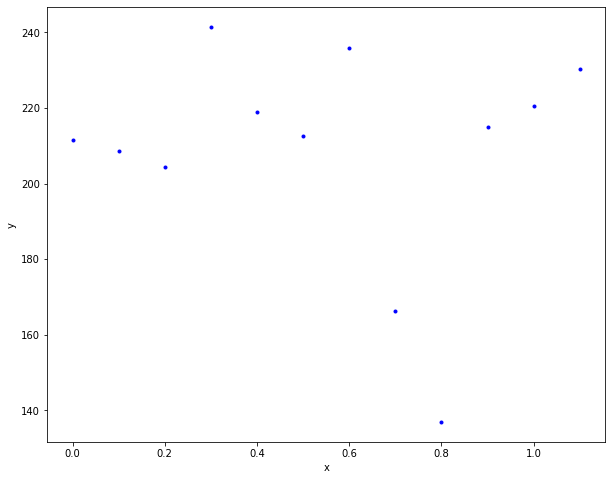

In [14]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
# plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [15]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [16]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[ -9.51048951]
 [213.78076923]]


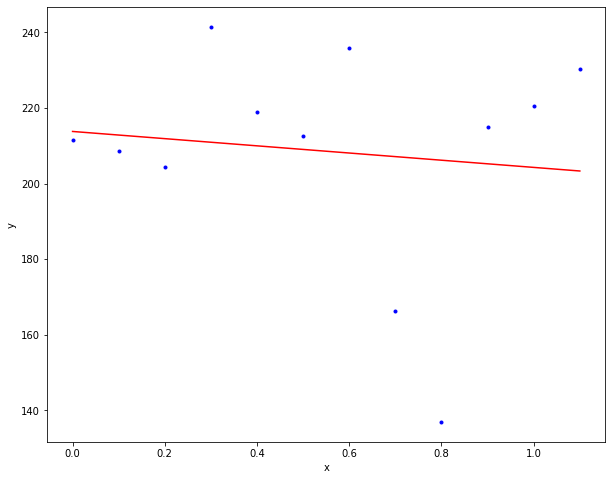

In [17]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- `optimize.curve_fit`을 사용해 보기

In [18]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

In [19]:
y

array([[211.5],
       [208.7],
       [204.5],
       [241.5],
       [219. ],
       [212.7],
       [235.8],
       [166.3],
       [136.9],
       [214.9],
       [220.4],
       [230.4]])

In [27]:
def func1(x, a, b):
    y = a*x + b
    return y

alpha1 = optimize.curve_fit(func1, xdata = x, ydata = y.T[0])[0]
print(alpha1)

[ -9.51048744 213.78076788]


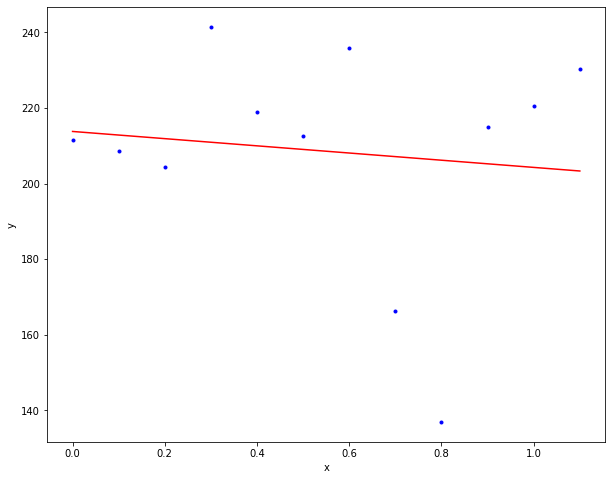

In [28]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha1[0]*x + alpha1[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
def func2(x, a, b, c):
    y = a*x**2 + b*x + c
    return y

alpha2 = optimize.curve_fit(func2, xdata = x, ydata = y.T[0])[0]
print(alpha)

[ 495.31216467 -763.63370619  275.73696287  199.09523409]


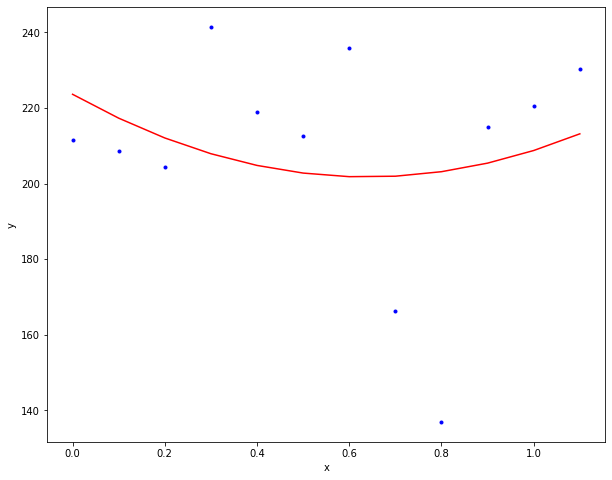

In [32]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha2[0]*x**2 + alpha2[1]*x + alpha2[2], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
def func3(x, a, b, c, d):
    y = a*x**3 + b*x**2 + c*x + d
    return y

alpha3 = optimize.curve_fit(func3, xdata = x, ydata = y.T[0])[0]
print(alpha)

[ 495.31216467 -763.63370619  275.73696287  199.09523409]


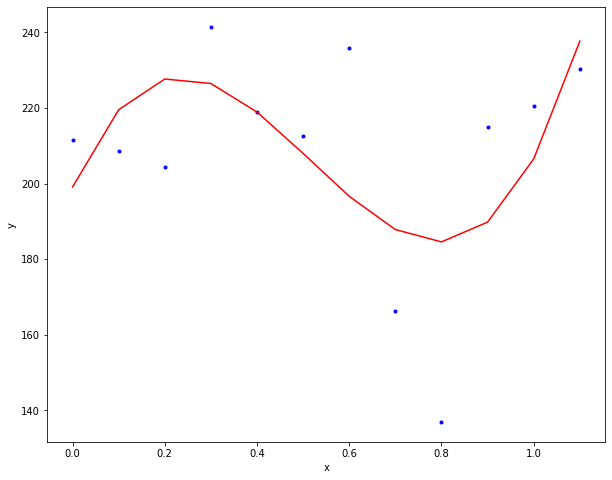

In [36]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha3[0]*x**3 + alpha3[1]*x**2 + alpha3[2]*x + alpha3[3], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- 한꺼번에 그려보기

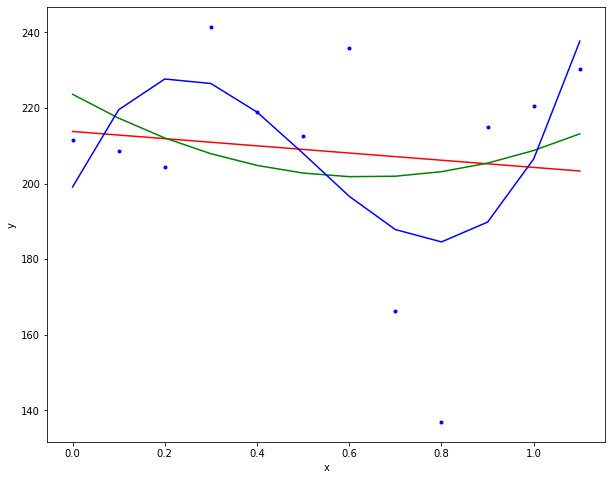

In [38]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha1[0]*x + alpha1[1], 'r')
plt.plot(x, alpha2[0]*x**2 + alpha2[1]*x + alpha2[2], 'g')
plt.plot(x, alpha3[0]*x**3 + alpha3[1]*x**2 + alpha3[2]*x + alpha3[3], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()